In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from plot_diff_si import * 

| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        | Linear                                          | Connector                                                         |
|-----------------|--------------------------------|-------------------------------------------------|-------------------------------------------------------------------|
| $n^{\rm av}$    | $n^{\rm av}$                   | Fig. \ref{fig:ixed_n0_nmean}, linear-mean       | YES/NO                                                            |
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | YES/NO                                          | YES/NO                                                            |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | linear-lda-meanlda                              | YES/NO                                                            |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | YES/NO                                          | Fig. \ref{fig:connectors_Diff_Si} or \ref{fig:All_Approx_Diff_Si} |
| $n({\bf r}) $   | $ n({\bf r})$                  | Fig. \ref{fig:LinearApprox_Diff_Si}, linear-lda | YES/NO                                                            |
| $n^M$           | $(n^{\rm av}+n^M)/2$           | YES/NO                                          | YES/NO                                                            |
| $n^M$           | $(n({\bf r}')+n^M)/2$          | YES/NO                                          | YES/NO                                                            |


# id by numbers: 
| $n_{0,{\bf r}}$ | $n^{{\bf r}'}_{\bf r} $        | Linear                                          | Connector                                                         |
|-----------------|--------------------------------|-------------------------------------------------|-------------------------------------------------------------------|
| $n^{\rm av}$    | $n^{\rm av}$                   | lin1      | con1                                                            |
| $n^{\rm av}$    | $(n({\bf r}')+ n^{\rm av})/2 $ | lin2                                          | con2                                                            |
| $n({\bf r})$    | $ (n^{\rm av}+n({\bf r})/2$    | lin3                              | con3                                                              |
| $n({\bf r}) $   | $ (n({\bf r}')+ n({\bf r}))/2$ | lin4                                          | con4 |
| $n({\bf r}) $   | $ n({\bf r})$                  | lin5 | con5                                                            |
| $n^M$           | $(n^{\rm av}+n^M)/2$           | lin6                                          | con6                                                            |
| $n^M$           | $(n({\bf r}')+n^M)/2$          | lin7                                          | con7                                                             |


- Linear approx: 
    $$ v_{xc}({\bf r};[n]) \approx  	v_{\rm xc}^h(n_{0,{\bf r}}) + \int d {\bf r}'   (n({\bf r}')-n_{0,{\bf r}})f_{\rm xc}(|{\bf r}-{\bf r}'|; n_{\bf r}^{{\bf r}'} ) $$ 
- Connector approx : 
$$ n^{c,{\rm approx}}_{\mathbf{r}}([n])= \frac {1}{f_{\rm xc}^h( n^h_{{\bf r}})} \int d\mathbf{r}' n(\mathbf{r}') f_{\rm xc}(|\mathbf{r}-\mathbf{r}'|; n_{\bf r}^{{\bf r}'} ) $$
$$ n^h_{{\bf r}}=\frac{n_{0,{\bf r}} + n^{c,{\rm approx}}_{\mathbf{r}}([n])}{2} $$

In [2]:
si_data= pd.read_csv("si_qmc_dens_vxc.csv",index_col=0)

In [3]:
newdens_QMC = si_data["density_qmc"].to_numpy()
vxc_qmc=si_data["vxc_qmc"].to_numpy()
newerbar_QMC = si_data["erbar_qmc"].to_numpy()
erbar= get_dens_inSD_si(newerbar_QMC)

## Analyse

In [4]:
def get_data_from_npz(npz_file, get_vars=1,it=-1): 
    hold= np.load(npz_file)
    num_iter=len(hold["dens_history"])
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    bands=hold["bands_history"][it]
    residu= hold["diff_l"].real
    direct_gap=(bands[0,4]-bands[0,3]) * 27.211
    gap=np.min( np.abs(bands[:,4]-bands[0,3]) ) * 27.211
    ## usefult prints 
    print("============")
    print("number of iterations is ", num_iter)
    print("diff on density for the last iteration: {:.2e}".format(residu[it]))
    print("The direct gap is {:.4f} ev | QMC = 2.72 ev".format(direct_gap))
    #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
    print("============")
    ####
    if get_vars:
        return dens, vxc, direct_gap, gap, residu, bands 

In [26]:
# old LDA 
dens_LDA_old=np.load('densLDA_25ry6k.npz')["densR"]

# Vxc=vxc(mean)
densR_mean=np.load('densmean_NY.npz')["densR"]
diag_mean=get_dens_inSD_si(densR_mean)

# LDA 
dens_LDA_NY= np.genfromtxt("densLDA_25ry6k.dat")
vxc_ref_lda=np.genfromtxt("VXC_lda.dat")

# n0=n(r)
densR_LinLDA_NY=np.load('densLinLDA_NY_si.npz')["densR"]
vxc_LinLDA_NY_para=np.load('densLinLDA_si_para.npz')["potxc_history"][-1]

#n0=nmean 
densR_Linmean=np.load('densLinmean_25ry6k.npz')["densR"]
densR_Linmean_NY= densR_Linmean + dens_LDA_NY-dens_LDA_old
vxc_Linmean_NY_para=np.load('densLinMean_si_para.npz')["potxc_history"][-4]

# n0= 0.5 (nc(r) + n(r))  
densR_Lin05ncnr= np.load('densLinSym05ncnr.npz')["densR"] 
vxc_Lin05ncnr_NY_para=np.load('densLinapprox_sym05ncnr.npz')["potxc_history"][8]

# n0 = 0.5 (n(r) + n(r'))
densR_LinSym_NY=np.load('densLinSym_direct.npz')["densR"]

# n_0= 0.5 (n(r) + nmean) 
dens_linmeanlda,vxc_linmeanlda,_,_,_,_= get_data_from_npz("si_linear_meanlda.npz")

# n1_0 = n(r) ; n2_0= 0.5 (n(r) + nmean) 
dens_linmeanlda2,vxc_linmeanlda2,_,_,_,_= get_data_from_npz("si_0O_lda_1O_linear_meanlda.npz")

number of iterations is  85
diff on density for the last iteration: 1.62e-17
The direct gap is 2.6227 ev | QMC = 2.72 ev
number of iterations is  40
diff on density for the last iteration: 1.40e-15
The direct gap is 2.5999 ev | QMC = 2.72 ev


In [32]:
si_dict={}
nacl_dict={}
#-------
si_dict["lin1"] = {"fname": "si_linear_mean.npz"} 
nacl_dict["lin1"] = {"fname": "nacl_linear_mean.npz"} 

si_dict["con1"] = {"fname": "si_con_mean.npz"} 
nacl_dict["con1"] = {"fname": "nacl_con_mean.npz"} 
#------

#-------
si_dict["lin2"] = {"fname": "si_tab_lin_2linear_consym.npz"} 
nacl_dict["lin2"] = {"fname": "nacl_lin_2.npz"} 

si_dict["con2"] = {"fname": "si_tab_con_2con_consym.npz"} 
nacl_dict["con2"] = {"fname": "nacl_con_2.npz"} 
#------

si_dict["lin3"] = {"fname": "si_0O_lda_1O_linear_meanlda.npz"} 
nacl_dict["lin3"] = {"fname": "nacl_0O_lda_1O_linear_meanlda.npz"} 

si_dict["con3"] = {"fname": "si_tab_con_3con_consym.npz"} 
nacl_dict["con3"] = {"fname": "nacl_con_3.npz"} 

#-------
si_dict["lin4"] = {"fname": "si_tab_lin_4linear_consym.npz"}
nacl_dict["lin4"] = {"fname": "nacl_lin_4.npz"} 

si_dict["con4"] = {"fname": "si_consym_old.npz"} 
nacl_dict["con4"] = {"fname": "nacl_con05ncnr.npz"} 
#------


#-------
si_dict["lin5"] = {"fname": "si_linear_lda.npz"} 
nacl_dict["lin5"] = {"fname": "nacl_linear_lda.npz"}

si_dict["con5"] = {"fname": "si_tab_con_5con_consym.npz"} 
nacl_dict["con5"] = {"fname": "nacl_con_5.npz"} 

#-------
si_dict["lin6"] = {"fname": "si_tab_lin_6linear_consym.npz"}
nacl_dict["lin6"] = {"fname": "nacl_lin_6.npz"} 

si_dict["con6"] = {"fname": "si_tab_con_6con_consym.npz"}
nacl_dict["con6"] = {"fname": "nacl_con_6.npz"} 

#------
si_dict["lin7"] = {"fname": "si_tab_lin_7linear_consym.npz"} 
nacl_dict["lin7"] = {"fname": "nacl_lin_7.npz"} 

si_dict["con7"] = {"fname": "si_tab_con_7con_consym.npz"}
nacl_dict["con7"] = {"fname": "nacl_con_7.npz"} 

#------



# Si

In [ ]:
for f in si_dict : 
    print (si_dict[f]["fname"])
    if si_dict[f]["fname"] is not None:
        dens,vxc,direct_gap,_,_,_= get_data_from_npz(si_dict[f]["fname"], it=-1)
        si_dict[f]["dens"],si_dict[f]["vxc"], si_dict[f]["direct_gap"] = dens,vxc, direct_gap 
    
#print("consym sc12")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_list=[]

for f in si_dict : 
    if si_dict[f]["fname"] is not None:
        diff= get_dens_inSD_si(si_dict[f]["dens"]-newdens_QMC)
        diff_list.append( (f,diff) )

diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 
#plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx,[diff_list[d][0] for d in range(len(diff_list)) ] 
#               ,erbar, ymin=-10, ymax=15) 

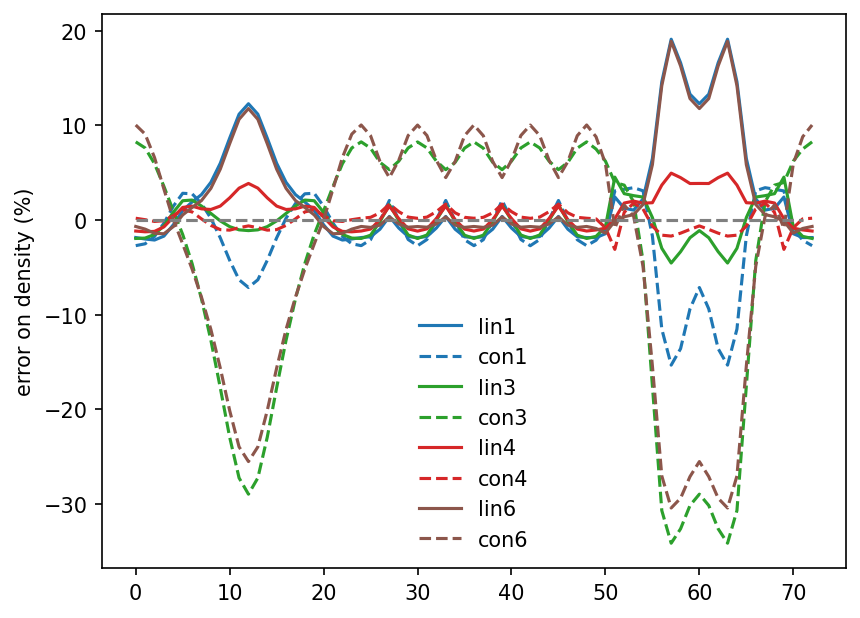

In [9]:
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["font.size"]=10


diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 

for i in [0,4,6,10]: #range(0,len(diff_list),2):
    plt.plot(100*diff_list[i][1]/get_dens_inSD_si(newdens_QMC), color="C"+str(i//2), label=diff_list[i][0])
    plt.plot(100*diff_list[i+1][1]/get_dens_inSD_si(newdens_QMC), ls="dashed",color="C"+str(i//2) , label=diff_list[i+1][0] )
    
plt.hlines(0,0,71, color="grey", ls="dashed")
plt.legend(frameon=False)
plt.ylabel("error on density (%)")
plt.show()

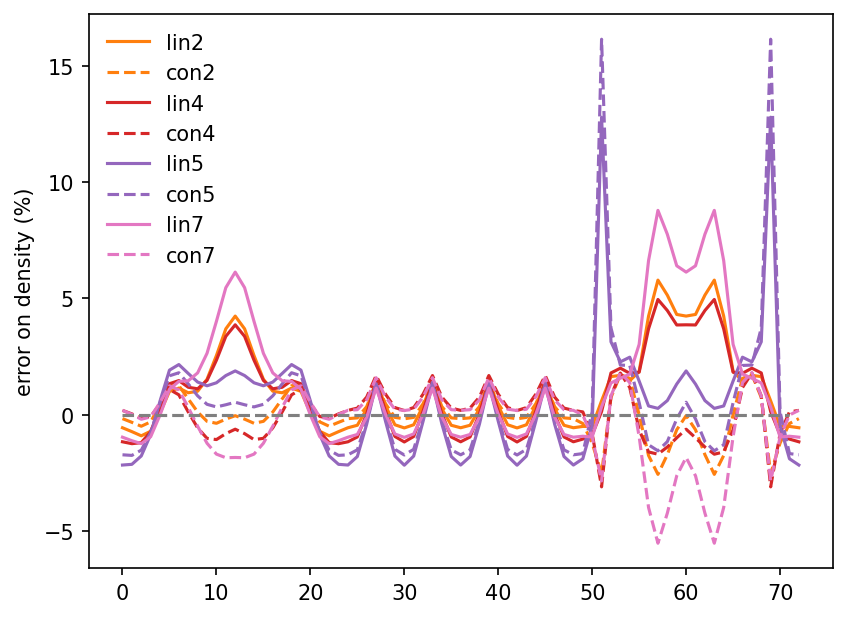

In [10]:
diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 

for i in [2,6,8,12]: #range(0,len(diff_list),2):
    plt.plot(100*diff_list[i][1]/get_dens_inSD_si(newdens_QMC), color="C"+str(i//2), label=diff_list[i][0])
    plt.plot(100*diff_list[i+1][1]/get_dens_inSD_si(newdens_QMC), ls="dashed",color="C"+str(i//2) , label=diff_list[i+1][0] )
    
plt.hlines(0,0,71, color="grey", ls="dashed")
plt.legend(frameon=False)
plt.ylabel("error on density (%)")

plt.show()


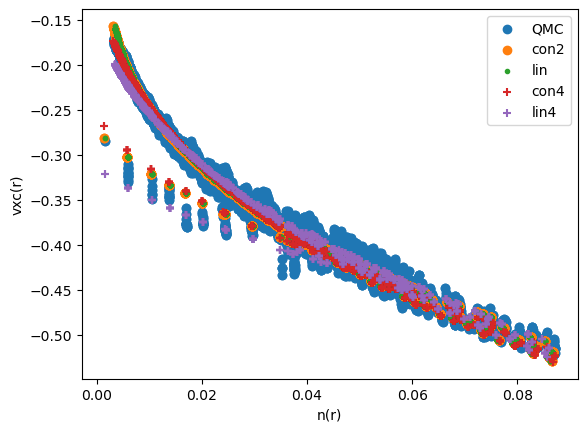

In [11]:
plt.rcdefaults()
#with plt.style.context("latex-sans"):
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
plt.scatter(si_dict["con2"]["dens"], si_dict["con2"]["vxc"].real, label="con2")
plt.scatter(si_dict["lin2"]["dens"], si_dict["con2"]["vxc"].real, label="lin", marker=".")

plt.scatter(si_dict["con4"]["dens"], si_dict["con4"]["vxc"].real,marker="+", label="con4")
plt.scatter(si_dict["lin4"]["dens"], si_dict["lin2"]["vxc"].real,marker="+", label="lin4")


plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

In [12]:
si_direct_gaps_data = pd.DataFrame()
si_dens_vxc_error_data = pd.DataFrame()

for key in si_dict: 
    #si_direct_gaps_data.loc[i,"approx"] = key
    si_direct_gaps_data.loc[key,"Direct KS Gap (ev)"]= si_dict[key]["direct_gap"]
    
    si_dens_vxc_error_data.loc[key,"density MeanARE(%)"]= np.mean( np.abs(si_dict[key]["dens"]/newdens_QMC - 1)*100) 
    si_dens_vxc_error_data.loc[key,"density MaxARE(%)"]= np.max( np.abs(si_dict[key]["dens"]/newdens_QMC - 1)*100)
    
    si_dens_vxc_error_data.loc[key,"vxc MeanARE(%)"]= np.mean( np.abs(si_dict[key]["vxc"]/vxc_qmc - 1)*100) 
    si_dens_vxc_error_data.loc[key,"vxc MaxARE(%)"]= np.max( np.abs(si_dict[key]["vxc"]/vxc_qmc - 1)*100)
    
    
si_direct_gaps_data["Relative error (%)"] = 100*np.abs(si_direct_gaps_data["Direct KS Gap (ev)"]-2.72)/2.72

si_direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%)
con4,2.712888,0.261467
con7,2.699317,0.760410
con2,2.683594,1.338442
lin2,2.680077,1.467759
lin6,2.673908,1.694557
lin7,2.659588,2.221044
lin4,2.652349,2.487182
lin1,2.619205,3.705715
con5,2.613952,3.898833
lin3,2.599908,4.415136


Text(0, 0.5, 'direct gap relative error (%)')

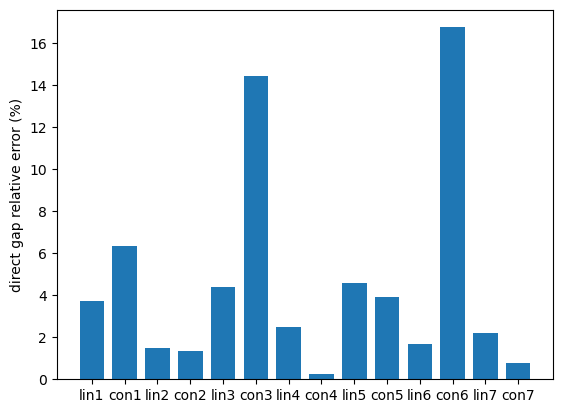

In [13]:
##
si_dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in si_dens_vxc_error_data.index ]
si_direct_gaps_data.loc[:,"type"]= [d[:3] for d in si_direct_gaps_data.index ]

##
plt.bar(si_direct_gaps_data.index,si_direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

In [14]:
si_dens_vxc_error_data.sort_values("density MeanARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con2,0.655304,2.677106,2.134488,9.713088,con
con5,0.731284,16.150255,4.010595,222.897714,con
lin5,0.863028,12.795390,3.373571,289.561194,lin
con4,0.896628,3.105093,2.339848,10.893325,con
lin3,0.958560,4.553394,2.933091,25.421544,lin
lin4,0.993922,5.088436,2.758641,15.849763,lin
lin2,1.013095,5.877652,3.024428,19.078135,lin
con7,1.087670,5.529501,2.699489,17.102637,con
lin7,1.510200,8.792685,3.909131,25.681183,lin
con1,2.278997,15.344668,7.063219,82.802702,con


Text(0, 0.5, 'MeanARE(%)')

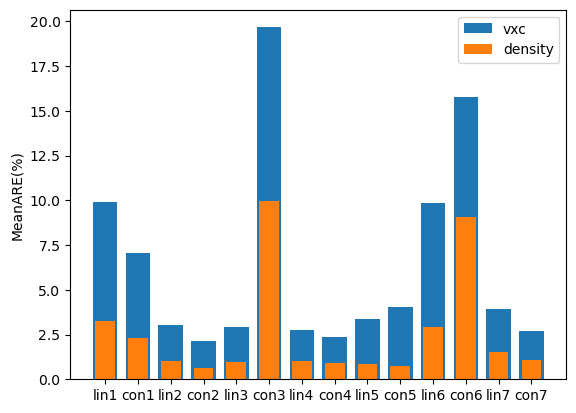

In [15]:
plt.bar(si_dens_vxc_error_data.index,si_dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(si_dens_vxc_error_data.index,si_dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

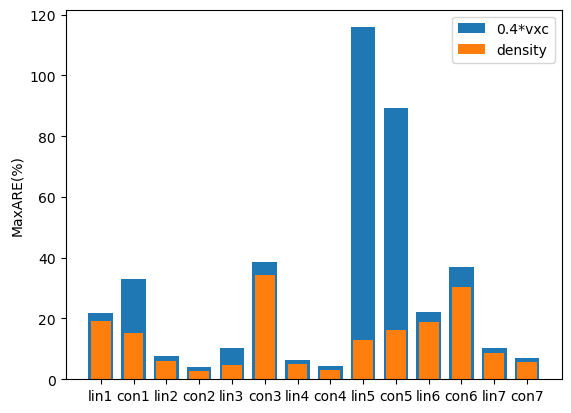

In [16]:
plt.bar(si_dens_vxc_error_data.index,0.4*si_dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.4*vxc")
plt.bar(si_dens_vxc_error_data.index,si_dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density", color="C1")
plt.legend()
plt.ylabel("MaxARE(%)")

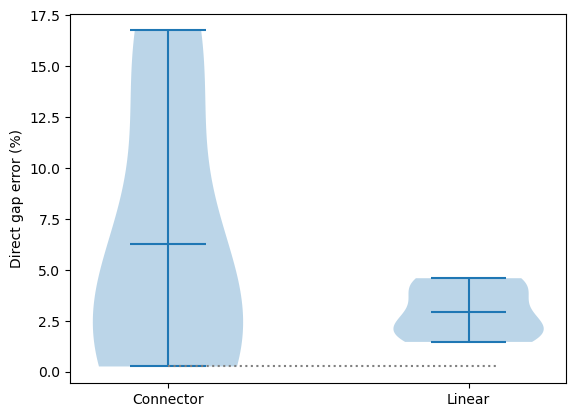

In [17]:
df_g=si_direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

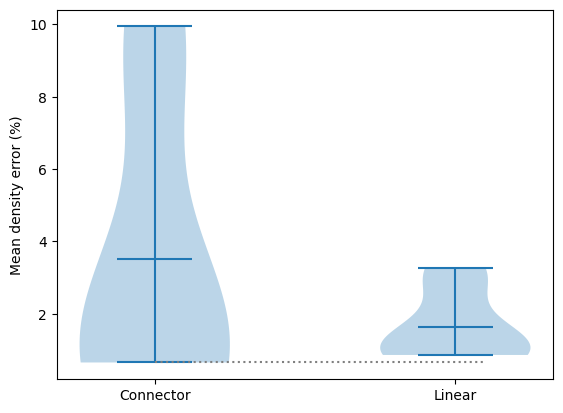

In [18]:
vlist= [si_dens_vxc_error_data[si_dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        si_dens_vxc_error_data[si_dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(si_dens_vxc_error_data[si_dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")

# NaCl 

In [19]:
from plot_diff_nacl import * 
nacl_data=pd.read_csv("nacl_qmc.csv")


In [20]:
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
erbar_nacl=nacl_QMC_prim[:,-1]

In [21]:
def get_data_from_npz_nacl(npz_file, it=-1,skip_band=0): 
    hold= np.load(npz_file)
    num_iter=len(hold["dens_history"])

    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    if not skip_band:
        bands=hold["bands_history"][it]
        residu= hold["diff_l"].real
        direct_gap=(bands[0,8]-bands[0,7]) * 27.211
        gap=np.min( np.abs(bands[:,8]-bands[0,7]) ) * 27.211
        print("============")
        print("number of iterations is ", num_iter)
        print("diff on density for the last iteration: {:.2e}".format(residu[it]))
        print("The direct gap is {:.4f} ev | QMC = 5.25 ev".format(direct_gap))
        #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
        print("============")
        return dens, vxc, direct_gap, gap, residu, bands 
    return dens , vxc 


In [22]:
newdens_QMC_nacl = nacl_data["dens"].to_numpy()
vxc_qmc_nacl=nacl_data["vxc_corr_shift"].to_numpy()
##
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
newerbar_QMC_nacl=nacl_QMC_prim[:,-1]
##
erbar_nacl= get_dens_inSD_nacl(newerbar_QMC_nacl)

In [50]:
for f in nacl_dict : 
    print (nacl_dict[f]["fname"])
    if nacl_dict[f]["fname"] is not None:
        try: dens,vxc,direct_gap,_,_,_= get_data_from_npz_nacl(nacl_dict[f]["fname"], it=-1,skip_band=0)
        except: 
            dens,vxc= get_data_from_npz_nacl(nacl_dict[f]["fname"], it=-1,skip_band=1) 
            direct_gap=4.870 # cocnsym old
        nacl_dict[f]["dens"],nacl_dict[f]["vxc"], nacl_dict[f]["direct_gap"] = dens,vxc, direct_gap 
    
#print("consym sc12")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_list=[]

for f in nacl_dict : 
    if nacl_dict[f]["fname"] is not None:
        diff= get_dens_inSD_nacl(nacl_dict[f]["dens"]-newdens_QMC_nacl)
        diff_list.append( (f,diff) )

diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 
#plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx,[diff_list[d][0] for d in range(len(diff_list)) ] 
#               ,erbar, ymin=-10, ymax=15)

nacl_linear_mean.npz
number of iterations is  15
diff on density for the last iteration: 7.66e-06
The direct gap is 3.5951 ev | QMC = 5.25 ev
nacl_con_mean.npz
number of iterations is  15
diff on density for the last iteration: 7.81e-08
The direct gap is 4.5600 ev | QMC = 5.25 ev
nacl_lin_2.npz
number of iterations is  5
diff on density for the last iteration: 1.35e-04
The direct gap is 4.2255 ev | QMC = 5.25 ev
nacl_con_2.npz
number of iterations is  5
diff on density for the last iteration: 6.16e-05
The direct gap is 4.9275 ev | QMC = 5.25 ev
nacl_0O_lda_1O_linear_meanlda.npz
number of iterations is  8
diff on density for the last iteration: 1.13e-05
The direct gap is 4.9019 ev | QMC = 5.25 ev
nacl_con_3.npz
number of iterations is  5
diff on density for the last iteration: 1.69e-04
The direct gap is 5.4488 ev | QMC = 5.25 ev
nacl_lin_4.npz
number of iterations is  5
diff on density for the last iteration: 7.23e-05
The direct gap is 4.5476 ev | QMC = 5.25 ev
nacl_con05ncnr.npz
nacl_l

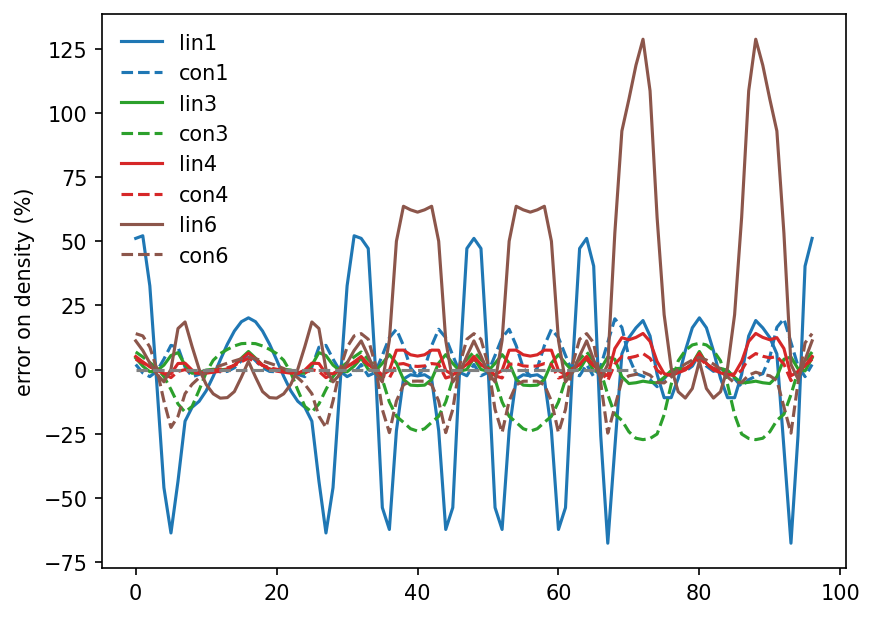

In [51]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["font.size"]=10


diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 

for i in [0,4,6,10]: #range(0,len(diff_list),2):
    plt.plot(100*diff_list[i][1]/get_dens_inSD_nacl(newdens_QMC_nacl), color="C"+str(i//2), label=diff_list[i][0])
    plt.plot(100*diff_list[i+1][1]/get_dens_inSD_nacl(newdens_QMC_nacl), ls="dashed",color="C"+str(i//2) , label=diff_list[i+1][0] )
    
plt.hlines(0,0,71, color="grey", ls="dashed")
plt.legend(frameon=False)
plt.ylabel("error on density (%)")
plt.show()

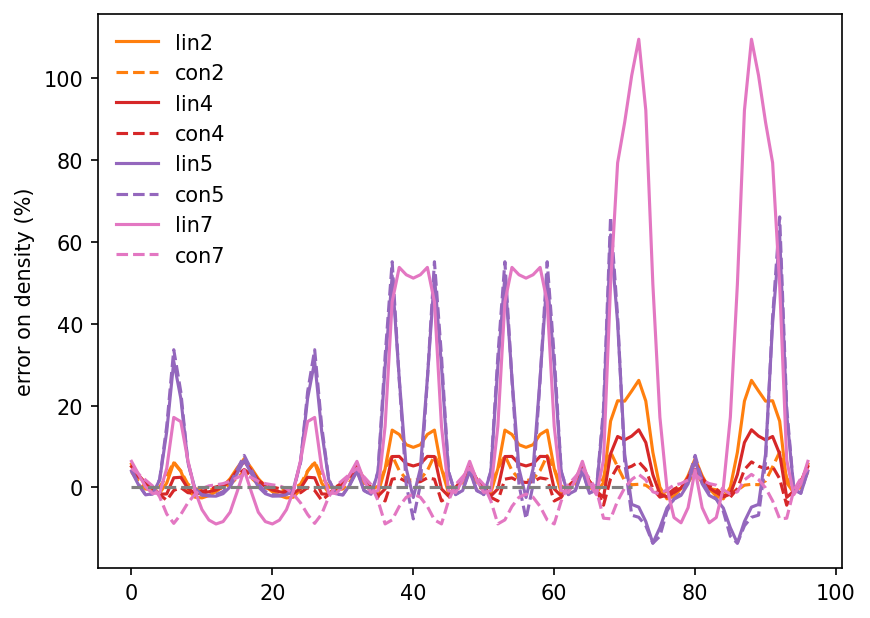

In [52]:
diff_approx= [diff_list[d][1] for d in range(len(diff_list)) ] 

for i in [2,6,8,12]: #range(0,len(diff_list),2):
    plt.plot(100*diff_list[i][1]/get_dens_inSD_nacl(newdens_QMC_nacl), color="C"+str(i//2), label=diff_list[i][0])
    plt.plot(100*diff_list[i+1][1]/get_dens_inSD_nacl(newdens_QMC_nacl), ls="dashed",color="C"+str(i//2) , label=diff_list[i+1][0] )
    
plt.hlines(0,0,71, color="grey", ls="dashed")
plt.legend(frameon=False)
plt.ylabel("error on density (%)")

plt.show()


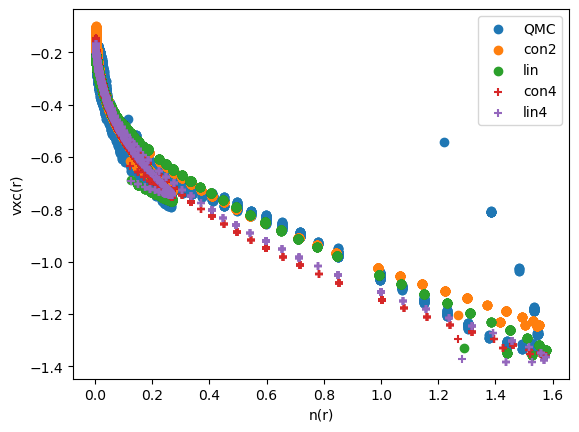

In [57]:
plt.rcdefaults()
#with plt.style.context("latex-sans"):
plt.scatter(newdens_QMC_nacl,vxc_qmc_nacl, label="QMC")
plt.scatter(nacl_dict["con2"]["dens"], nacl_dict["con2"]["vxc"].real, label="con2")
plt.scatter(nacl_dict["lin2"]["dens"], nacl_dict["lin2"]["vxc"].real, label="lin", marker="o")

plt.scatter(nacl_dict["con4"]["dens"], nacl_dict["con4"]["vxc"].real,marker="+", label="con4")
plt.scatter(nacl_dict["lin4"]["dens"], nacl_dict["lin4"]["vxc"].real,marker="+", label="lin4")

#plt.scatter(nacl_dict["con7"]["dens"], nacl_dict["con7"]["vxc"].real,marker="+", label="con4")


plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

In [54]:
nacl_direct_gaps_data = pd.DataFrame()
nacl_dens_vxc_error_data = pd.DataFrame()

for key in nacl_dict: 
    #nacl_direct_gaps_data.loc[i,"approx"] = key
    nacl_direct_gaps_data.loc[key,"Direct KS Gap (ev)"]= nacl_dict[key]["direct_gap"]
    
    nacl_dens_vxc_error_data.loc[key,"density MeanARE(%)"]= np.mean( np.abs(nacl_dict[key]["dens"]/newdens_QMC_nacl - 1)*100) 
    nacl_dens_vxc_error_data.loc[key,"density MaxARE(%)"]= np.max( np.abs(nacl_dict[key]["dens"]/newdens_QMC_nacl - 1)*100)
    
    nacl_dens_vxc_error_data.loc[key,"vxc MeanARE(%)"]= np.mean( np.abs(nacl_dict[key]["vxc"]/vxc_qmc_nacl - 1)*100) 
    nacl_dens_vxc_error_data.loc[key,"vxc MaxARE(%)"]= np.max( np.abs(nacl_dict[key]["vxc"]/vxc_qmc_nacl - 1)*100)
    
    
nacl_direct_gaps_data["Relative error (%)"] = 100*np.abs(nacl_direct_gaps_data["Direct KS Gap (ev)"]-5.25)/2.72

nacl_direct_gaps_data.sort_values("Relative error (%)")

,Direct KS Gap (ev),Relative error (%)
con7,5.323739,2.710995
con3,5.448813,7.309305
con6,4.987161,9.663180
con2,4.927507,11.856368
lin3,4.901935,12.796510
con4,4.870000,13.970588
con1,4.559988,25.368073
lin4,4.547621,25.822752
lin2,4.225491,37.665768
lin1,3.595101,60.841868


Text(0, 0.5, 'direct gap relative error (%)')

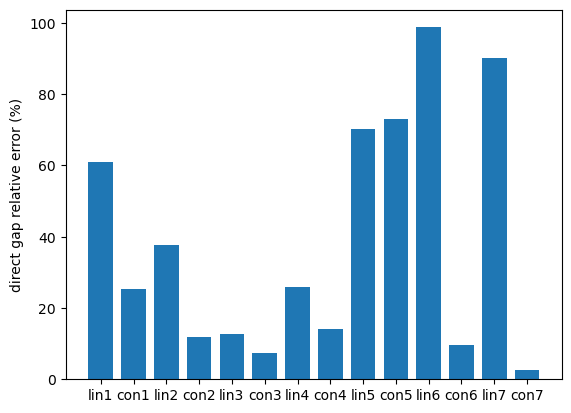

In [58]:
##
nacl_dens_vxc_error_data.loc[:,"type"]= [d[:3] for d in nacl_dens_vxc_error_data.index ]
nacl_direct_gaps_data.loc[:,"type"]= [d[:3] for d in nacl_direct_gaps_data.index ]

##
plt.bar(nacl_direct_gaps_data.index,nacl_direct_gaps_data["Relative error (%)"], width=0.75)
plt.ylabel("direct gap relative error (%)")

In [60]:
nacl_dens_vxc_error_data.sort_values("density MeanARE(%)")

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%),type
con4,1.660153,6.227838,8.101433,138.110630,con
con2,1.997989,9.577521,10.053928,121.462530,con
con7,2.988242,9.578190,11.436097,146.540742,con
lin3,3.127511,7.172564,20.463741,172.897833,lin
lin4,3.489790,14.077939,10.747734,152.621944,lin
con1,4.549852,21.892328,25.322741,122.594208,con
lin2,6.372733,26.155725,16.873136,144.266334,lin
con6,6.564534,25.305302,16.745271,300.583221,con
lin5,12.471687,62.833871,45.380952,244.996589,lin
con5,13.620817,67.248301,52.238466,266.875491,con


Text(0, 0.5, 'MeanARE(%)')

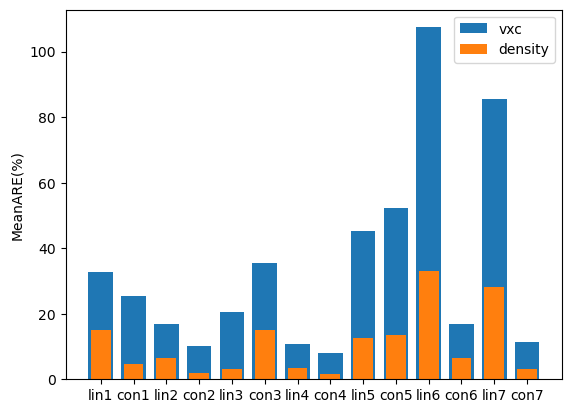

In [62]:
plt.bar(nacl_dens_vxc_error_data.index,nacl_dens_vxc_error_data["vxc MeanARE(%)"], width=0.75, label="vxc")
plt.bar(nacl_dens_vxc_error_data.index,nacl_dens_vxc_error_data["density MeanARE(%)"], width=0.6, label="density")
plt.legend()
plt.ylabel("MeanARE(%)")

Text(0, 0.5, 'MaxARE(%)')

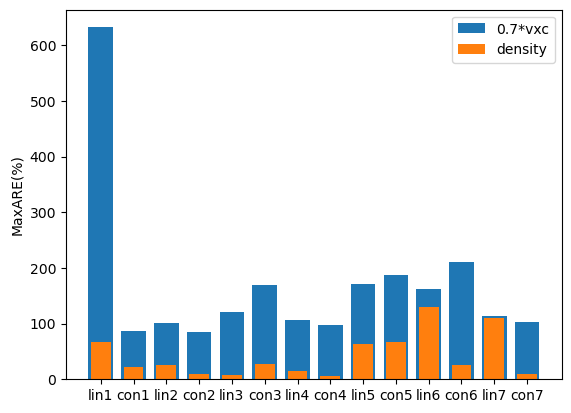

In [69]:
plt.bar(nacl_dens_vxc_error_data.index,0.7*nacl_dens_vxc_error_data["vxc MaxARE(%)"], width=0.75, label="0.7*vxc")
plt.bar(nacl_dens_vxc_error_data.index,nacl_dens_vxc_error_data["density MaxARE(%)"], width=0.6, label="density")
plt.legend()
plt.ylabel("MaxARE(%)")

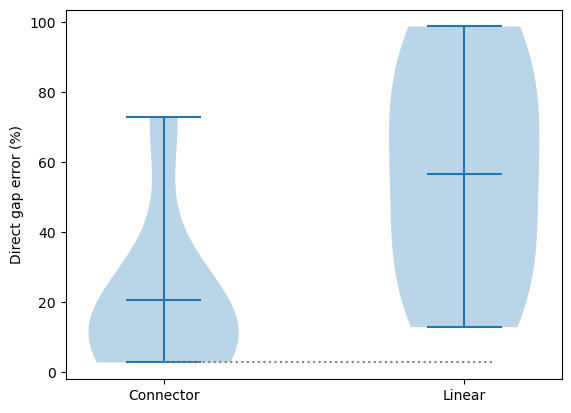

In [71]:
df_g=nacl_direct_gaps_data 
vlist= [df_g[df_g["type"]=="con"]["Relative error (%)"],
        df_g[df_g["type"]=="lin"]["Relative error (%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Direct gap error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(df_g[df_g["type"]=="con"]["Relative error (%)"].min(),1,2.1, color="grey", ls="dotted")

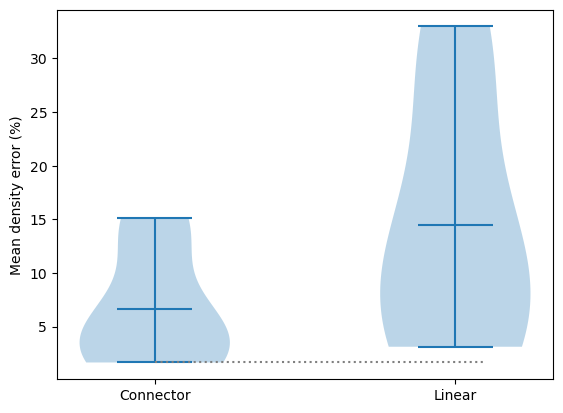

In [72]:
vlist= [nacl_dens_vxc_error_data[nacl_dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"],
        nacl_dens_vxc_error_data[nacl_dens_vxc_error_data["type"]=="lin"]["density MeanARE(%)"]]
plt.violinplot(vlist,showmeans=True)
#plt.legend(["Connector","Linear"])
plt.ylabel("Mean density error (%)")
plt.xticks([1,2],["Connector","Linear"])
plt.hlines(nacl_dens_vxc_error_data[nacl_dens_vxc_error_data["type"]=="con"]["density MeanARE(%)"].min(),1,2.1, color="grey", ls="dotted")